# Import Python Packages & Libraries

In [1]:
import geopandas as gpd
import matplotlib.colors as colors
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from astropy.modeling import models, fitting
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as py
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from IPython.display import display_html 
from shapely.geometry import Point, Polygon

class BOLD:
   B_start = '\033[1m'
   B_end = '\033[0m'
class UNDERLINE:
    U_start = '\033[4m'
    U_end = '\033[0m'

# Fine particulate matter (PM2.5)

### Line Plots (2016, 2017, 2018)

DATE               object
FIPS                int64
AQI_CONC          float64
AQI_UNITS          object
SITE_NAME          object
AQI_PARAMETER      object
COUNTY             object
SITE_LATITUDE     float64
SITE_LONGITUDE    float64
dtype: object
Bronx       366
Kings       366
New York    366
Richmond    366
Queens      366
Name: COUNTY, dtype: int64


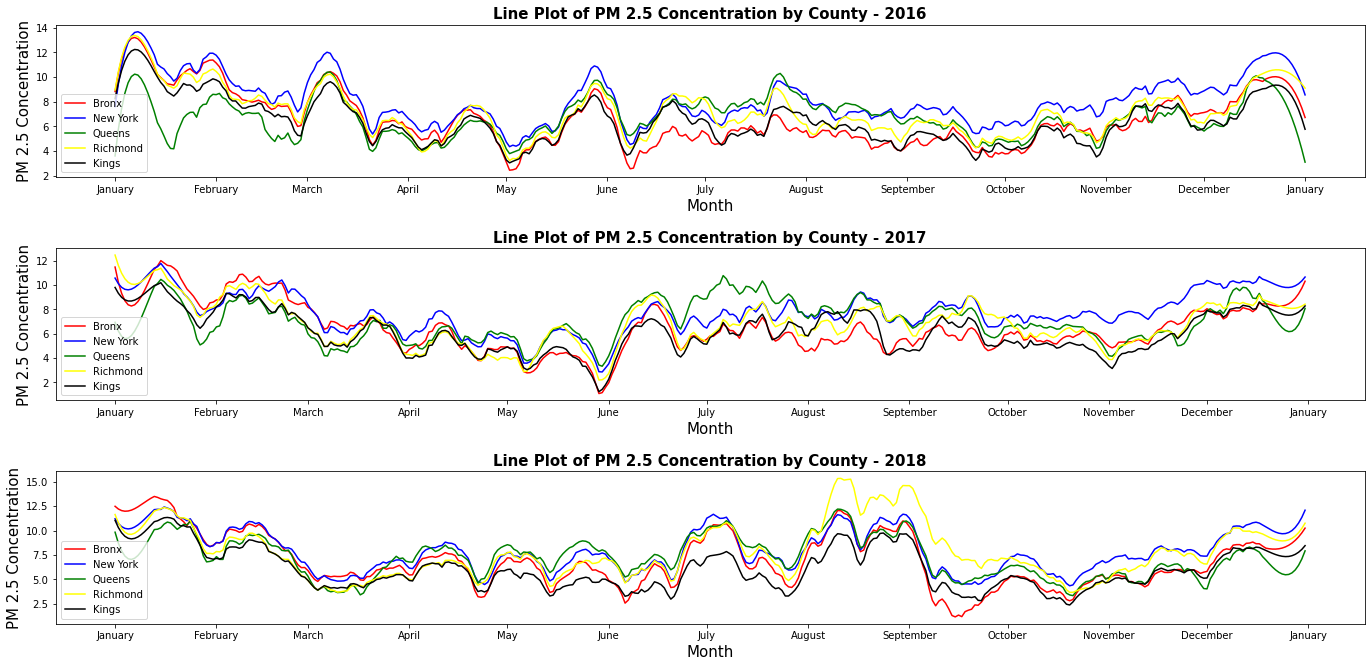

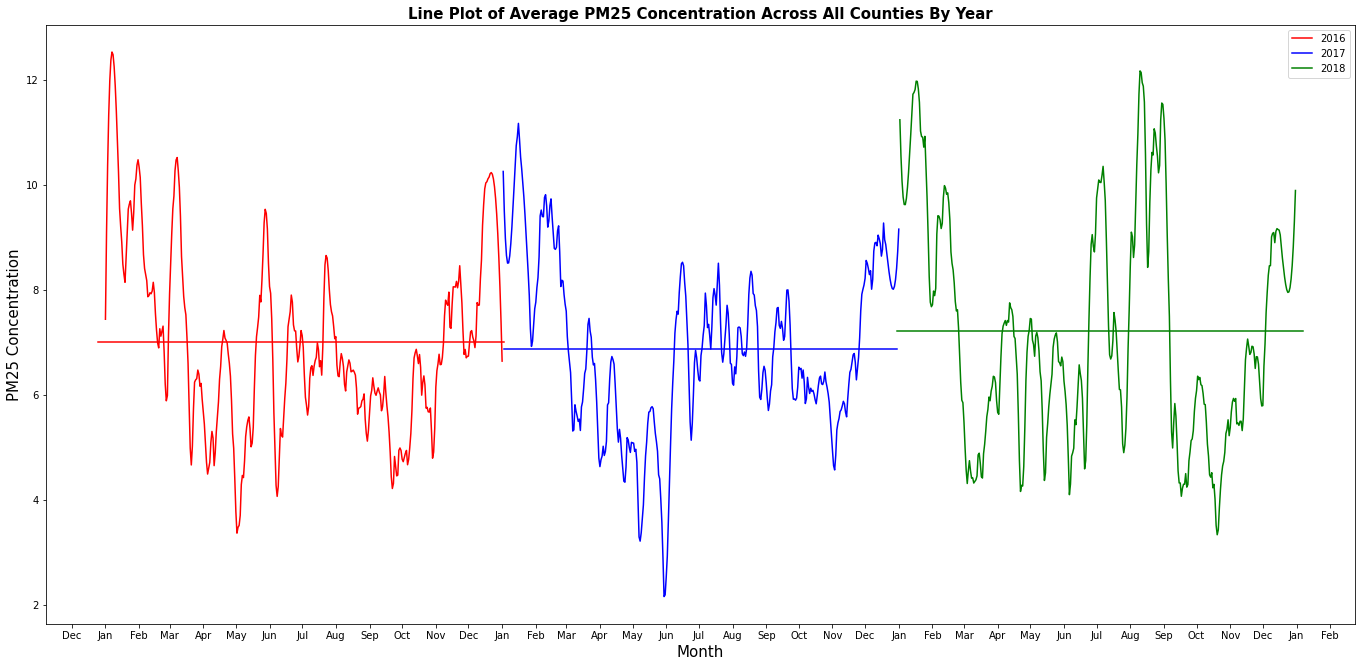

In [2]:
PM25_2016 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/PM2.5/PM25.2016.All_Sites_NEW.csv")
PM25_2017 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/PM2.5/PM25.2017.All_Sites_NEW.csv")
PM25_2018 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/PM2.5/PM25.2018.All_Sites_NEW.csv")
print(PM25_2016.dtypes)

print(PM25_2016["COUNTY"].value_counts())

# Bronx PM2.5 (2016, 2017, 2018)
BRONX_PM25_2016 = PM25_2016[PM25_2016["COUNTY"] == "Bronx"]
BRONX_PM25_2017 = PM25_2017[PM25_2017["COUNTY"] == "Bronx"]
BRONX_PM25_2018 = PM25_2018[PM25_2018["COUNTY"] == "Bronx"]

BRONX_COMBINED = pd.DataFrame()
BRONX_COMBINED = pd.concat([BRONX_PM25_2016.reset_index(drop = True, inplace = False),
                BRONX_PM25_2017.reset_index(drop = True, inplace = False),
                BRONX_PM25_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# New York PM2.5 (2016, 2017, 2018)
NY_PM25_2016 = PM25_2016[PM25_2016["COUNTY"] == "New York"]
NY_PM25_2017 = PM25_2017[PM25_2017["COUNTY"] == "New York"]
NY_PM25_2018 = PM25_2018[PM25_2018["COUNTY"] == "New York"]

NY_COMBINED = pd.DataFrame()
NY_COMBINED = pd.concat([NY_PM25_2016.reset_index(drop = True, inplace = False),
                NY_PM25_2017.reset_index(drop = True, inplace = False),
                NY_PM25_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Queens PM2.5 (2016, 2017, 2018)
QUEENS_PM25_2016 = PM25_2016[PM25_2016["COUNTY"] == "Queens"]
QUEENS_PM25_2017 = PM25_2017[PM25_2017["COUNTY"] == "Queens"]
QUEENS_PM25_2018 = PM25_2018[PM25_2018["COUNTY"] == "Queens"]

QUEENS_COMBINED = pd.DataFrame()
QUEENS_COMBINED = pd.concat([QUEENS_PM25_2016.reset_index(drop = True, inplace = False),
                QUEENS_PM25_2017.reset_index(drop = True, inplace = False),
                QUEENS_PM25_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Richmond PM2.5 (2016, 2017, 2018)
RICHMOND_PM25_2016 = PM25_2016[PM25_2016["COUNTY"] == "Richmond"]
RICHMOND_PM25_2017 = PM25_2017[PM25_2017["COUNTY"] == "Richmond"]
RICHMOND_PM25_2018 = PM25_2018[PM25_2018["COUNTY"] == "Richmond"]

RICHMOND_COMBINED = pd.DataFrame()
RICHMOND_COMBINED = pd.concat([RICHMOND_PM25_2016.reset_index(drop = True, inplace = False),
                RICHMOND_PM25_2017.reset_index(drop = True, inplace = False),
                RICHMOND_PM25_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Kings PM2.5 (2016, 2017, 2018)
KINGS_PM25_2016 = PM25_2016[PM25_2016["COUNTY"] == "Kings"]
KINGS_PM25_2017 = PM25_2017[PM25_2017["COUNTY"] == "Kings"]
KINGS_PM25_2018 = PM25_2018[PM25_2018["COUNTY"] == "Kings"]

KINGS_COMBINED = pd.DataFrame()
KINGS_COMBINED = pd.concat([KINGS_PM25_2016.reset_index(drop = True, inplace = False),
                KINGS_PM25_2017.reset_index(drop = True, inplace = False),
                KINGS_PM25_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

PM25_2016_MEAN = PM25_2016.groupby(PM25_2016["DATE"])["AQI_CONC"].mean()
PM25_2017_MEAN = PM25_2017.groupby(PM25_2017["DATE"])["AQI_CONC"].mean()
PM25_2018_MEAN = PM25_2018.groupby(PM25_2018["DATE"])["AQI_CONC"].mean()

# Line Plot Overlaying Each County for PM2.5 in 2016
fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["Bronx","New York","Queens","Richmond","Kings"]

# 2016
smoothed = savgol_filter(BRONX_PM25_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(BRONX_PM25_2016["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_PM25_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(NY_PM25_2016["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_PM25_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(QUEENS_PM25_2016["DATE"], smoothed, color = "green")
smoothed = savgol_filter(RICHMOND_PM25_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(RICHMOND_PM25_2016["DATE"], smoothed, color = "yellow")
smoothed = savgol_filter(KINGS_PM25_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(KINGS_PM25_2016["DATE"], smoothed, color = "black")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax1.set_title("Line Plot of PM 2.5 Concentration by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)

# 2017
smoothed = savgol_filter(BRONX_PM25_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(BRONX_PM25_2017["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_PM25_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(NY_PM25_2017["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_PM25_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(QUEENS_PM25_2017["DATE"], smoothed, color = "green")
smoothed = savgol_filter(RICHMOND_PM25_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(RICHMOND_PM25_2017["DATE"], smoothed, color = "yellow")
smoothed = savgol_filter(KINGS_PM25_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(KINGS_PM25_2017["DATE"], smoothed, color = "black")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax2.set_title("Line Plot of PM 2.5 Concentration by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
ax2.legend(labels = legend_labels)

# 2018
smoothed = savgol_filter(BRONX_PM25_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(BRONX_PM25_2018["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_PM25_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(NY_PM25_2018["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_PM25_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(QUEENS_PM25_2018["DATE"], smoothed, color = "green")
smoothed = savgol_filter(RICHMOND_PM25_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(RICHMOND_PM25_2018["DATE"], smoothed, color = "yellow")
smoothed = savgol_filter(KINGS_PM25_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(KINGS_PM25_2018["DATE"], smoothed, color = "black")
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax3.set_title("Line Plot of PM 2.5 Concentration by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
ax3.legend(labels = legend_labels)
plt.show()

# Averaged By Year (2016, 2017, 2018)
PM25_2016_MEAN = PM25_2016.groupby(PM25_2016["DATE"])["AQI_CONC"].mean().reset_index()
PM25_2017_MEAN = PM25_2017.groupby(PM25_2017["DATE"])["AQI_CONC"].mean().reset_index()
PM25_2018_MEAN = PM25_2018.groupby(PM25_2018["DATE"])["AQI_CONC"].mean().reset_index()

# Averaged By Year (2016, 2017, 2018)
fig, ax1  = plt.subplots(1, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["2016","2017","2018"]

# Averaged By Year (2016, 2017, 2018)
smoothed = savgol_filter(PM25_2016_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(PM25_2016_MEAN["DATE"], smoothed, color = "red")
smoothed = savgol_filter(PM25_2017_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(PM25_2017_MEAN["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(PM25_2018_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(PM25_2018_MEAN["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.set_title("Line Plot of Average PM25 Concentration Across All Counties By Year", fontweight = "bold", size = 15)
ax1.set_ylabel("PM25 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)
ax1.axhline(y = PM25_2016_MEAN["AQI_CONC"].mean(), color = "red", linestyle = '-', xmin = 0.04, xmax = 0.35)
ax1.axhline(y = PM25_2017_MEAN["AQI_CONC"].mean(), color = "blue", linestyle = '-', xmin = 0.35, xmax = 0.65)
ax1.axhline(y = PM25_2018_MEAN["AQI_CONC"].mean(), color = "green", linestyle = '-', xmin = 0.65, xmax = 0.96)

plt.show()

### Descriptive Statistics

In [3]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 2.5; Bronx"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(BRONX_PM25_2016["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_PM25_2017["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_PM25_2018["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_COMBINED["AQI_CONC"].describe())], 
                     ["Bronx - 2016",
                      "Bronx - 2017",
                      "Bronx - 2018",
                      "Bronx - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 2.5; New York"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(NY_PM25_2016["AQI_CONC"].describe()),
                      pd.DataFrame(NY_PM25_2017["AQI_CONC"].describe()),
                      pd.DataFrame(NY_PM25_2018["AQI_CONC"].describe()),
                      pd.DataFrame(NY_COMBINED["AQI_CONC"].describe())], 
                     ["New York - 2016",
                      "New York - 2017",
                      "New York - 2018",
                      "New York - Combined"])
print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 2.5; Queens"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(QUEENS_PM25_2016["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_PM25_2017["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_PM25_2018["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_COMBINED["AQI_CONC"].describe())], 
                     ["Queens - 2016",
                      "Queens - 2017",
                      "Queens - 2018",
                      "Queens - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 2.5; Richmond"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(RICHMOND_PM25_2016["AQI_CONC"].describe()),
                      pd.DataFrame(RICHMOND_PM25_2017["AQI_CONC"].describe()),
                      pd.DataFrame(RICHMOND_PM25_2018["AQI_CONC"].describe()),
                      pd.DataFrame(RICHMOND_COMBINED["AQI_CONC"].describe())], 
                     ["Richmond - 2016",
                      "Richmond - 2017",
                      "Richmond - 2018",
                      "Richmond - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - PM 2.5; Kings"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(KINGS_PM25_2016["AQI_CONC"].describe()),
                      pd.DataFrame(KINGS_PM25_2017["AQI_CONC"].describe()),
                      pd.DataFrame(KINGS_PM25_2018["AQI_CONC"].describe()),
                      pd.DataFrame(KINGS_COMBINED["AQI_CONC"].describe())], 
                     ["Kings - 2016",
                      "Kings - 2017",
                      "Kings - 2018",
                      "Kings - Combined"])

Descriptive Stats - PM 2.5; Bronx


,AQI_CONC
count,366.000000
mean,6.580328
std,3.929041
min,-1.000000
25%,3.900000
50%,6.000000
75%,8.800000
max,22.100000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - PM 2.5; New York


,AQI_CONC
count,366.000000
mean,8.136612
std,3.812643
min,1.700000
25%,5.225000
50%,7.650000
75%,10.100000
max,24.200000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - PM 2.5; Queens


,AQI_CONC
count,366.000000
mean,6.721858
std,3.696857
min,0.000000
25%,4.000000
50%,6.000000
75%,8.300000
max,27.000000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - PM 2.5; Richmond


,AQI_CONC
count,366.000000
mean,7.165574
std,3.632911
min,0.800000
25%,4.300000
50%,6.800000
75%,9.075000
max,19.400000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - PM 2.5; Kings


,AQI_CONC
count,366.000000
mean,6.423224
std,3.495364
min,0.000000
25%,3.800000
50%,6.000000
75%,8.300000
max,18.600000
,AQI_CONC
count,365.000000


### Box Plots (2016, 2017, 2018)

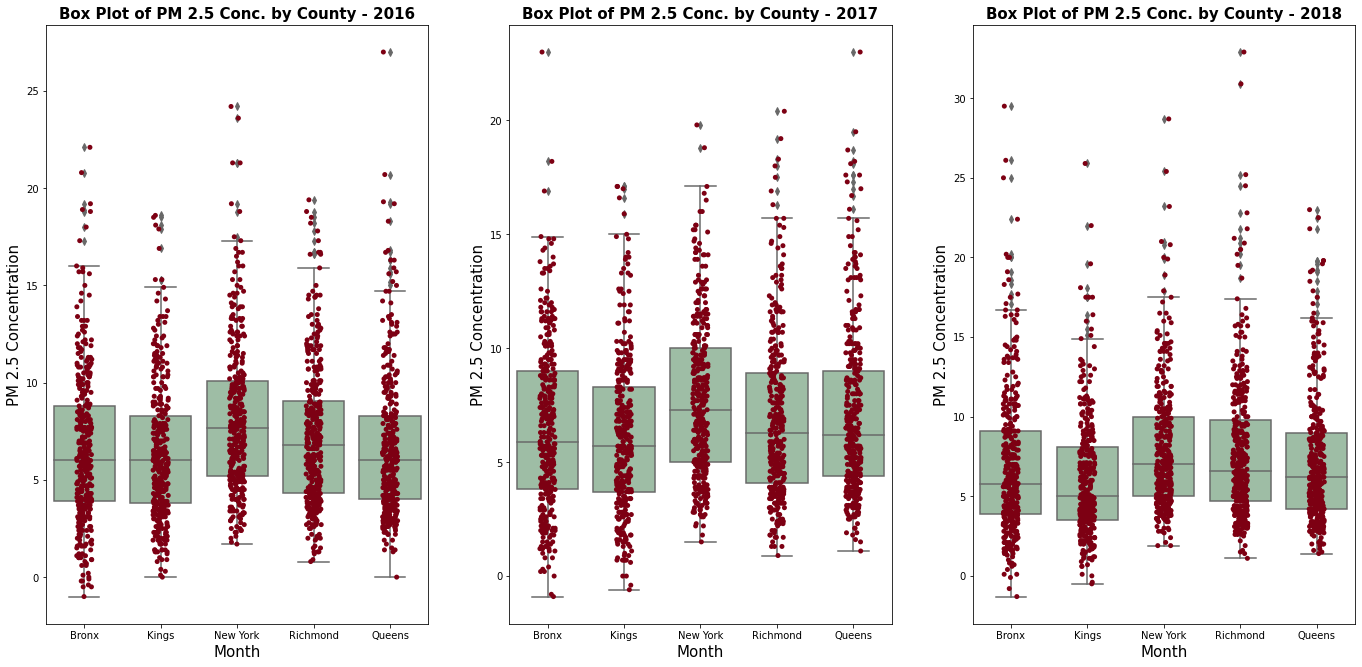

_________________________________________________________________________________


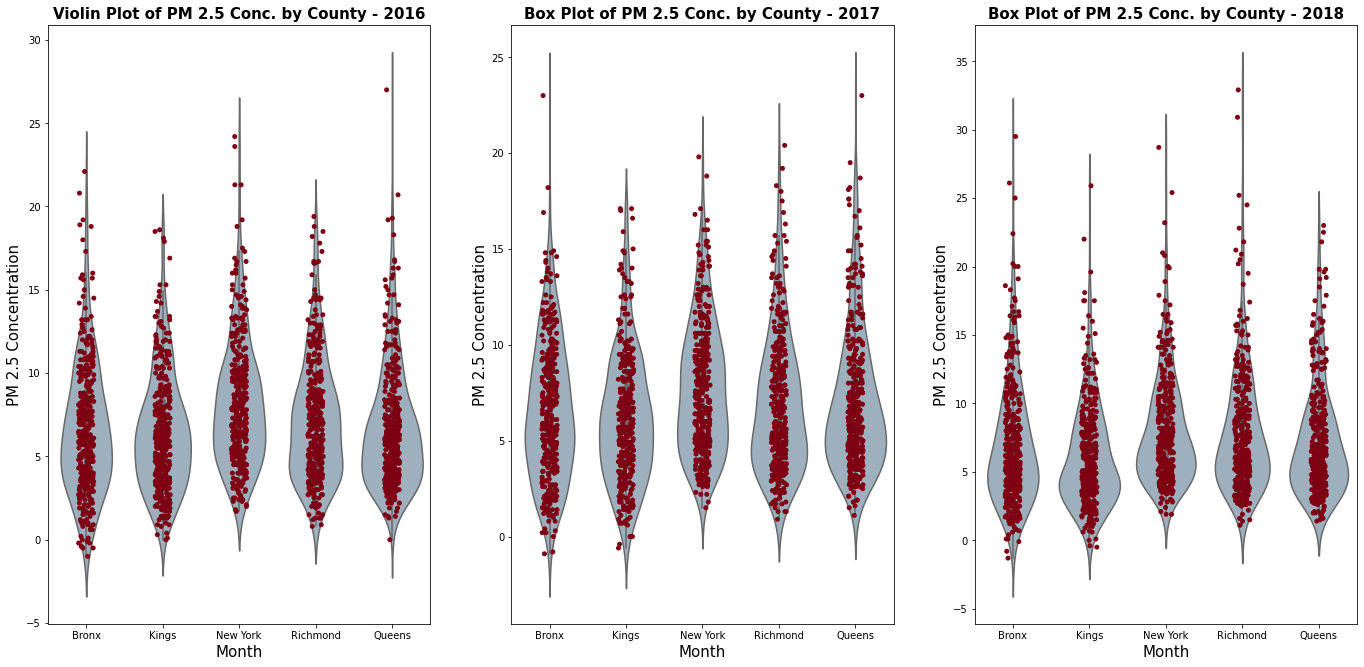

In [4]:
# Box Plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2016, color = "#99c2a2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of PM 2.5 Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2017, color = "#99c2a2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of PM 2.5 Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2018, color = "#99c2a2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of PM 2.5 Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# Violin Plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2016, color = "#99b1c2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Violin Plot of PM 2.5 Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2017, color = "#99b1c2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of PM 2.5 Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2018, color = "#99b1c2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = PM25_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of PM 2.5 Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("PM 2.5 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()


### T-Tests & ANOVA Tests (2016, 2017, 2018)

In [5]:
# T-Test comparison by variables

#2016
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 2.5 2016"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(NY_PM25_2016["AQI_CONC"],BRONX_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM25_2016["AQI_CONC"],BRONX_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM25_2016["AQI_CONC"],NY_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Bronx - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2016["AQI_CONC"],BRONX_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. NY - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2016["AQI_CONC"],NY_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Queens - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2016["AQI_CONC"],QUEENS_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Bronx - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2016["AQI_CONC"],BRONX_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Queens - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2016["AQI_CONC"],QUEENS_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. NY - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2016["AQI_CONC"],NY_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Richmond - PM 2.5 2016")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2016["AQI_CONC"],RICHMOND_PM25_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - PM 2.5 2016"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_PM25_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_PM25_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_PM25_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                RICHMOND_PM25_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                KINGS_PM25_2016["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx",3:"Richmond",4:"Kings"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Richmond + Kings + Kings:Bronx + Kings:NY + Kings:Queens + Kings:Richmond + Richmond:Bronx + Richmond:Queens + Richmond:NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

# The Pr(>F) column is the p value of the F statistic. 
# This shows how likely it is that the F value calculated from the test would have occurred if the null 
# hypothesis of no difference among group means were true.

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

#2017
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 2.5 2017"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(NY_PM25_2017["AQI_CONC"],BRONX_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM25_2017["AQI_CONC"],BRONX_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM25_2017["AQI_CONC"],NY_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Bronx - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2017["AQI_CONC"],BRONX_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. NY - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2017["AQI_CONC"],NY_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Queens - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2017["AQI_CONC"],QUEENS_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Bronx - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2017["AQI_CONC"],BRONX_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Queens - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2017["AQI_CONC"],QUEENS_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. NY - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2017["AQI_CONC"],NY_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Richmond - PM 2.5 2017")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2017["AQI_CONC"],RICHMOND_PM25_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - PM 2.5 2017"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_PM25_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_PM25_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_PM25_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                RICHMOND_PM25_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                KINGS_PM25_2017["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx",3:"Richmond",4:"Kings"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Richmond + Kings + Kings:Bronx + Kings:NY + Kings:Queens + Kings:Richmond + Richmond:Bronx + Richmond:Queens + Richmond:NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

#2018
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 2.5 2018"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(NY_PM25_2018["AQI_CONC"],BRONX_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM25_2018["AQI_CONC"],BRONX_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_PM25_2018["AQI_CONC"],NY_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Bronx - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2018["AQI_CONC"],BRONX_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. NY - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2018["AQI_CONC"],NY_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Queens - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(RICHMOND_PM25_2018["AQI_CONC"],QUEENS_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Bronx - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2018["AQI_CONC"],BRONX_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Queens - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2018["AQI_CONC"],QUEENS_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. NY - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2018["AQI_CONC"],NY_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Kings vs. Richmond - PM 2.5 2018")
fvalue, pvalue = stats.ttest_ind(KINGS_PM25_2018["AQI_CONC"],RICHMOND_PM25_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - PM 2.5 2018"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_PM25_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_PM25_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_PM25_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                RICHMOND_PM25_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                KINGS_PM25_2018["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx",3:"Richmond",4:"Kings"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Richmond + Kings + Kings:Bronx + Kings:NY + Kings:Queens + Kings:Richmond + Richmond:Bronx + Richmond:Queens + Richmond:NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - PM 2.5 All Years"+UNDERLINE.U_end+BOLD.B_end)
print("2016 vs. 2017 - PM 2.5")
fvalue, pvalue = stats.ttest_ind(PM25_2016_MEAN["AQI_CONC"],PM25_2017_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2016 vs. 2018 - PM 2.5")
fvalue, pvalue = stats.ttest_ind(PM25_2016_MEAN["AQI_CONC"],PM25_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2017 vs. 2018 - PM 2.5")
fvalue, pvalue = stats.ttest_ind(PM25_2017_MEAN["AQI_CONC"],PM25_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

T-Test - PM 2.5 2016
NY vs. Bronx - PM 2.5 2016
t-Value: 5.4383 p-Value: 7.345098972913828e-08


Queens vs. Bronx - PM 2.5 2016
t-Value: 0.5019 p-Value: 0.6158934373140952


Queens vs. NY - PM 2.5 2016
t-Value: -5.0965 p-Value: 4.410832031963168e-07


Richmond vs. Bronx - PM 2.5 2016
t-Value: 2.0923 p-Value: 0.03675509782292


Richmond vs. NY - PM 2.5 2016
t-Value: -3.5275 p-Value: 0.0004457282440942449


Richmond vs. Queens - PM 2.5 2016
t-Value: 1.6378 p-Value: 0.10190000819091291


Kings vs. Bronx - PM 2.5 2016
t-Value: -0.5715 p-Value: 0.5678146098709118


Kings vs. Queens - PM 2.5 2016
t-Value: -1.123 p-Value: 0.26182703331084506


Kings vs. NY - PM 2.5 2016
t-Value: -6.3373 p-Value: 4.091431084331756e-10


Kings vs. Richmond - PM 2.5 2016
t-Value: -2.8171 p-Value: 0.004977211465388916


ANOVA - PM 2.5 2016
                       sum_sq     df             F    PR(>F)
Bronx            6.442382e+02    1.0  5.799448e+28  0.000000
Queens           1.686765e-27    1.0  1.518430e-01  0.

### Histograms w/Curve Fitting (2016, 2017, 2018)

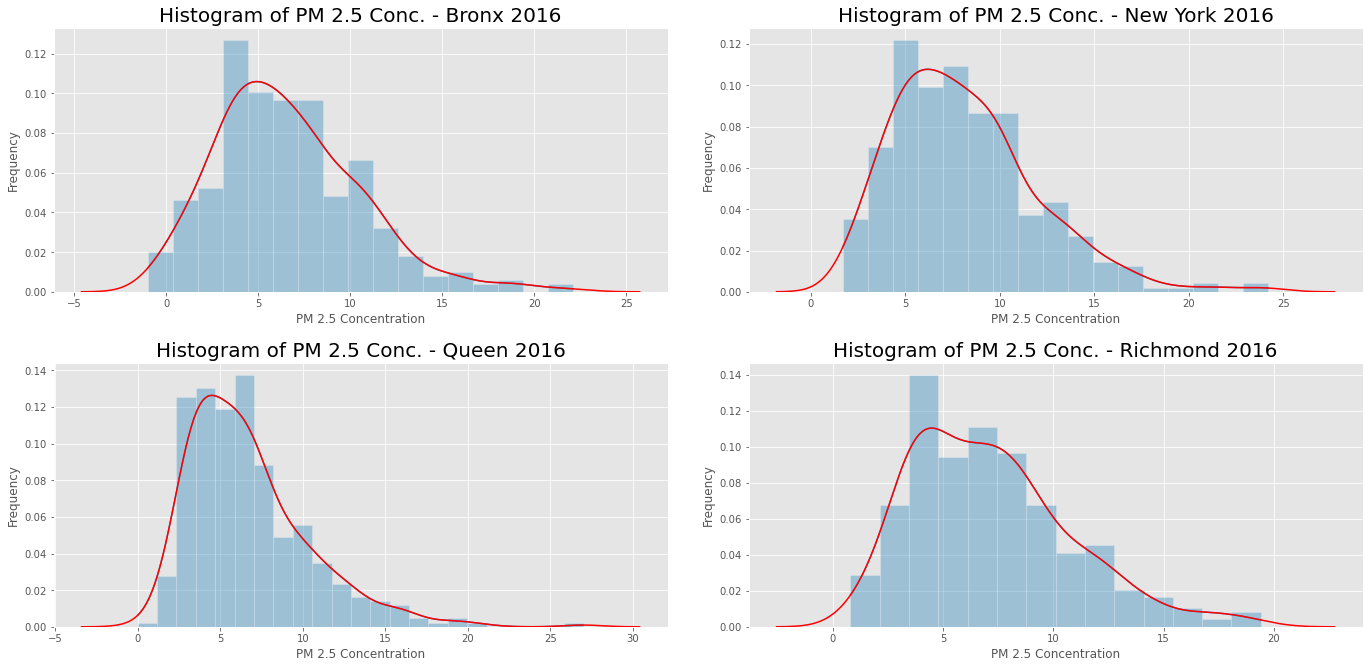

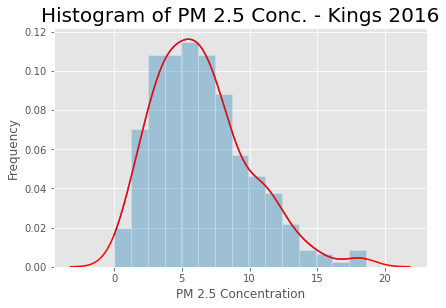

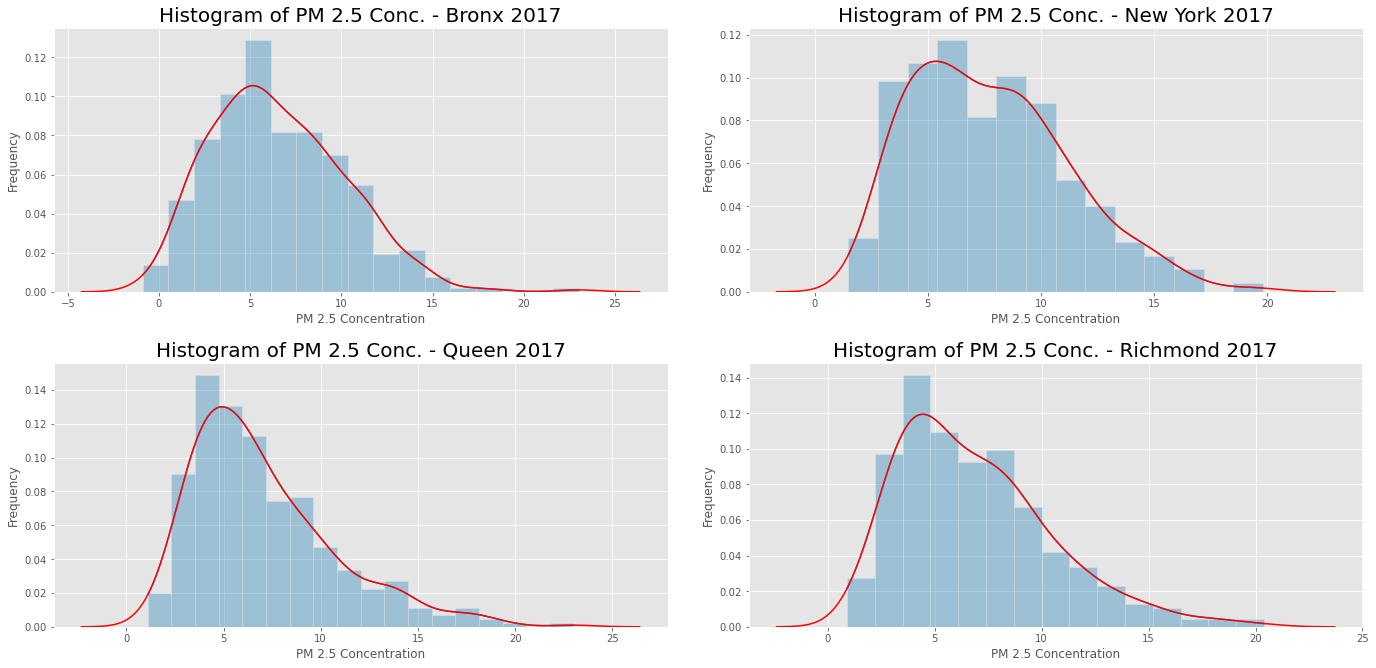

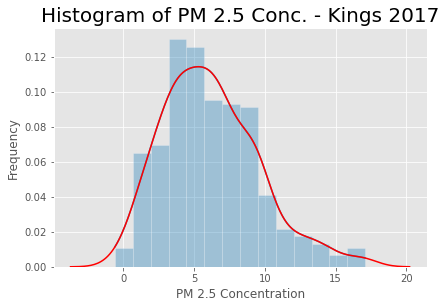

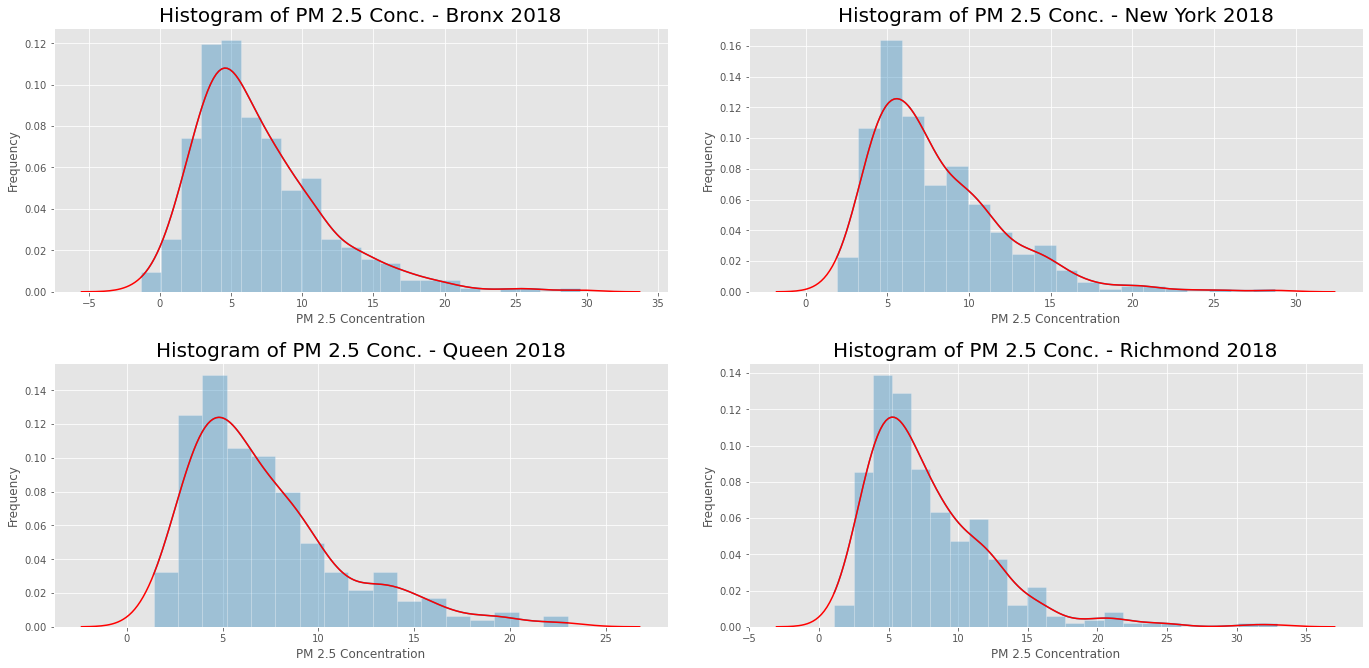

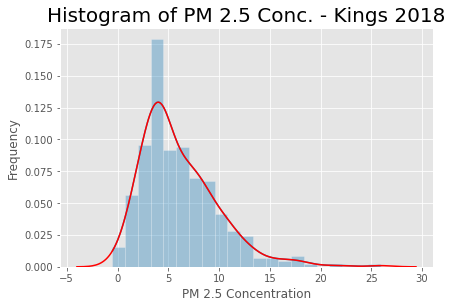



Shapiro-Wilk Test for Normality


,AQI,County,Year,Statistic,p-Value
0,PM 2.5,Bronx,2016,0.962413,4.421915e-08
1,PM 2.5,New York,2016,0.944796,1.926610e-10
2,PM 2.5,Queens,2016,0.902726,1.455294e-14
3,PM 2.5,Richmond,2016,0.952239,1.642797e-09
4,PM 2.5,Kings,2016,0.960296,2.140035e-08
5,PM 2.5,Bronx,2017,0.973935,3.815795e-06
6,PM 2.5,New York,2017,0.965960,1.630488e-07
7,PM 2.5,Queens,2017,0.913594,1.288996e-13
8,PM 2.5,Richmond,2017,0.942198,9.943053e-11
9,PM 2.5,Kings,2017,0.969540,6.348007e-07


D’Agostino and Pearson Test for Normality


,AQI,County,Year,Statistic,p-Value
0,PM 2.5,Bronx,2016,41.890413,8.009630e-10
1,PM 2.5,New York,2016,59.591389,1.147874e-13
2,PM 2.5,Queens,2016,105.786699,1.068342e-23
3,PM 2.5,Richmond,2016,36.396361,1.249196e-08
4,PM 2.5,Kings,2016,35.626935,1.835309e-08
5,PM 2.5,Bronx,2017,23.988597,6.179343e-06
6,PM 2.5,New York,2017,20.191306,4.125852e-05
7,PM 2.5,Queens,2017,70.267051,5.517011e-16
8,PM 2.5,Richmond,2017,46.459713,8.154579e-11
9,PM 2.5,Kings,2017,26.004432,2.255326e-06


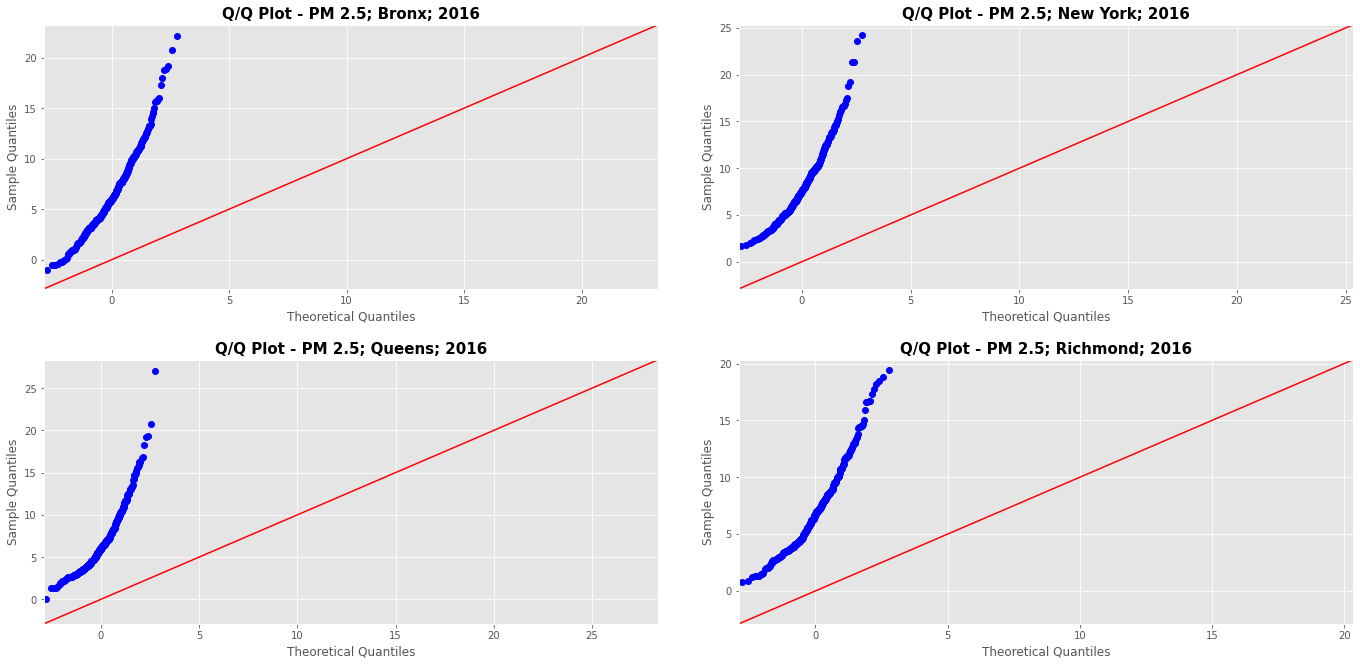

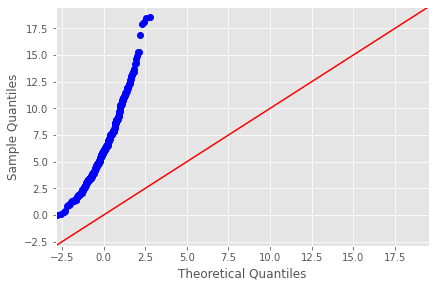

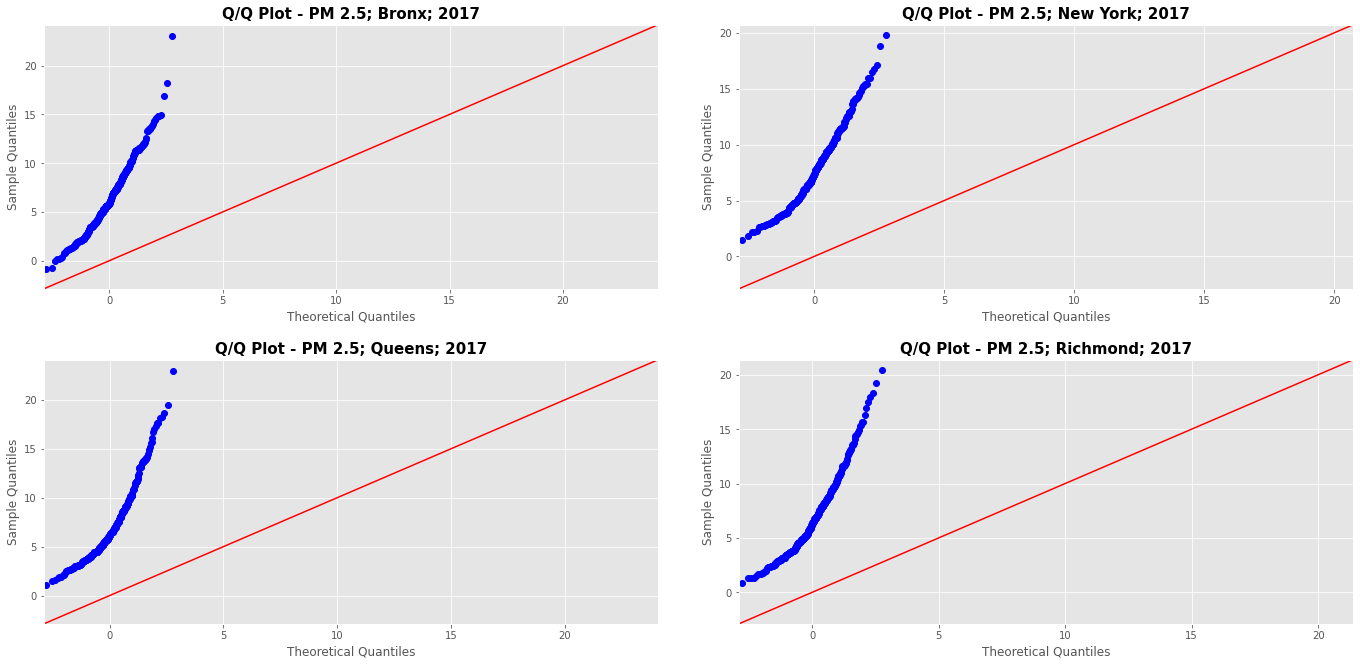

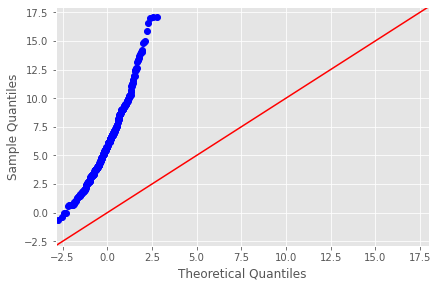

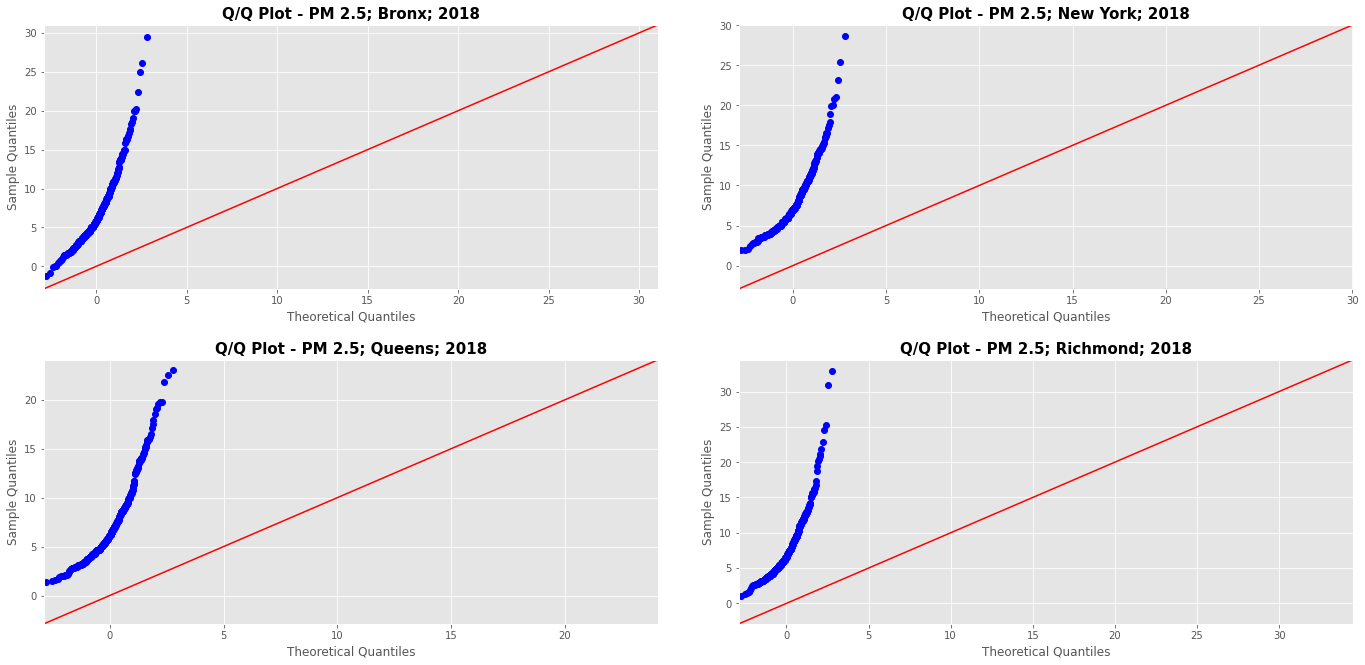

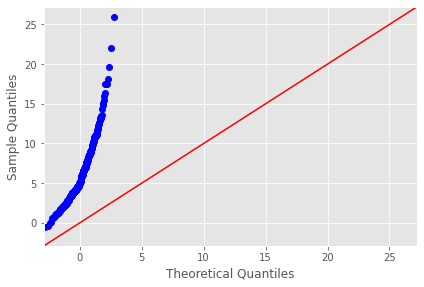

In [6]:
# 2016
plt.style.use("ggplot")
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 2.5 Concentration for Bronx County w/Curve Fit - 2016"
sns.histplot(BRONX_PM25_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_PM25_2016, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 2.5 Conc. - Bronx 2016", fontsize = 20)

# "Histogram of PM 2.5 Concentration for New York County w/Curve Fit - 2016"
sns.histplot(NY_PM25_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_PM25_2016, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of PM 2.5 Conc. - New York 2016", fontsize = 20)

# "Histogram of PM 2.5 Concentration for Queens County w/Curve Fit - 2016"
sns.histplot(QUEENS_PM25_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_PM25_2016, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of PM 2.5 Conc. - Queen 2016", fontsize = 20)

# "Histogram of PM 2.5 Concentration for Richmond County w/Curve Fit - 2016"
sns.histplot(RICHMOND_PM25_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax4)
sns.kdeplot(data = RICHMOND_PM25_2016, x = "AQI_CONC", color = "red", ax = ax4)
ax4.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax4.set_ylabel("Frequency", fontsize = 12)
ax4.set_title("Histogram of PM 2.5 Conc. - Richmond 2016", fontsize = 20)

plt.style.use("ggplot")
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 2.5 Concentration for Kings County w/Curve Fit - 2016"
sns.histplot(KINGS_PM25_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = KINGS_PM25_2016, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 2.5 Conc. - Kings 2016", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2017
plt.style.use("ggplot")
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 2.5 Concentration for Bronx County w/Curve Fit - 2017"
sns.histplot(BRONX_PM25_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_PM25_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 2.5 Conc. - Bronx 2017", fontsize = 20)

# "Histogram of PM 2.5 Concentration for New York County w/Curve Fit - 2017"
sns.histplot(NY_PM25_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_PM25_2017, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of PM 2.5 Conc. - New York 2017", fontsize = 20)

# "Histogram of PM 2.5 Concentration for Queens County w/Curve Fit - 2017"
sns.histplot(QUEENS_PM25_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_PM25_2017, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of PM 2.5 Conc. - Queen 2017", fontsize = 20)

# "Histogram of PM 2.5 Concentration for Richmond County w/Curve Fit - 2017"
sns.histplot(RICHMOND_PM25_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax4)
sns.kdeplot(data = RICHMOND_PM25_2017, x = "AQI_CONC", color = "red", ax = ax4)
ax4.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax4.set_ylabel("Frequency", fontsize = 12)
ax4.set_title("Histogram of PM 2.5 Conc. - Richmond 2017", fontsize = 20)

plt.style.use("ggplot")
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 2.5 Concentration for Kings County w/Curve Fit - 2017"
sns.histplot(KINGS_PM25_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = KINGS_PM25_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 2.5 Conc. - Kings 2017", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2018
plt.style.use("ggplot")
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 2.5 Concentration for Bronx County w/Curve Fit - 2018"
sns.histplot(BRONX_PM25_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_PM25_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 2.5 Conc. - Bronx 2018", fontsize = 20)

# "Histogram of PM 2.5 Concentration for New York County w/Curve Fit - 2018"
sns.histplot(NY_PM25_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_PM25_2018, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of PM 2.5 Conc. - New York 2018", fontsize = 20)

# "Histogram of PM 2.5 Concentration for Queens County w/Curve Fit - 2018"
sns.histplot(QUEENS_PM25_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_PM25_2018, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of PM 2.5 Conc. - Queen 2018", fontsize = 20)

# "Histogram of PM 2.5 Concentration for Richmond County w/Curve Fit - 2018"
sns.histplot(RICHMOND_PM25_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax4)
sns.kdeplot(data = RICHMOND_PM25_2018, x = "AQI_CONC", color = "red", ax = ax4)
ax4.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax4.set_ylabel("Frequency", fontsize = 12)
ax4.set_title("Histogram of PM 2.5 Conc. - Richmond 2018", fontsize = 20)

plt.style.use("ggplot")
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
fig.tight_layout(pad = 5.0)

# "Histogram of PM 2.5 Concentration for Kings County w/Curve Fit - 2018"
sns.histplot(KINGS_PM25_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = KINGS_PM25_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("PM 2.5 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of PM 2.5 Conc. - Kings 2018", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# H0 = Data was pulled from a normal distribution
# HT = Data was NOT pulled from a normal distribution
# The Shapiro-Wilk test rejects the null hypothesis of normality when the p-value is less than or equal to 0.05

shapiro_df = pd.DataFrame({})
print(BOLD.B_start+UNDERLINE.U_start+"Shapiro-Wilk Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
shapiro_df = shapiro_df.append([{"AQI":"PM 2.5","County":"Bronx","Year":2016,"Statistic":stats.shapiro(BRONX_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_PM25_2016["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"New York","Year":2016,"Statistic":stats.shapiro(NY_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_PM25_2016["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Queens","Year":2016,"Statistic":stats.shapiro(QUEENS_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_PM25_2016["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Richmond","Year":2016,"Statistic":stats.shapiro(RICHMOND_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(RICHMOND_PM25_2016["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Kings","Year":2016,"Statistic":stats.shapiro(KINGS_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(KINGS_PM25_2016["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Bronx","Year":2017,"Statistic":stats.shapiro(BRONX_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_PM25_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"New York","Year":2017,"Statistic":stats.shapiro(NY_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_PM25_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Queens","Year":2017,"Statistic":stats.shapiro(QUEENS_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_PM25_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Richmond","Year":2017,"Statistic":stats.shapiro(RICHMOND_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(RICHMOND_PM25_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Kings","Year":2017,"Statistic":stats.shapiro(KINGS_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(KINGS_PM25_2017["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Bronx","Year":2018,"Statistic":stats.shapiro(BRONX_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_PM25_2018["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"New York","Year":2018,"Statistic":stats.shapiro(NY_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_PM25_2018["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Queens","Year":2018,"Statistic":stats.shapiro(QUEENS_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_PM25_2018["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Richmond","Year":2018,"Statistic":stats.shapiro(RICHMOND_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(RICHMOND_PM25_2018["AQI_CONC"]).pvalue},
                {"AQI":"PM 2.5","County":"Kings","Year":2018,"Statistic":stats.shapiro(KINGS_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(KINGS_PM25_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(shapiro_df)

###############################################################################################################

# D’Agostino and Pearson Test for Normality
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

normality_df = pd.DataFrame()
print(BOLD.B_start+UNDERLINE.U_start+"D’Agostino and Pearson Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
normality_df = normality_df.append([{"AQI":"PM 2.5","County":"Bronx","Year":2016,"Statistic":stats.normaltest(BRONX_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_PM25_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"New York","Year":2016,"Statistic":stats.normaltest(NY_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_PM25_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Queens","Year":2016,"Statistic":stats.normaltest(QUEENS_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_PM25_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Richmond","Year":2016,"Statistic":stats.normaltest(RICHMOND_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(RICHMOND_PM25_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Kings","Year":2016,"Statistic":stats.normaltest(KINGS_PM25_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(KINGS_PM25_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Bronx","Year":2017,"Statistic":stats.normaltest(BRONX_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_PM25_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"New York","Year":2017,"Statistic":stats.normaltest(NY_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_PM25_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Queens","Year":2017,"Statistic":stats.normaltest(QUEENS_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_PM25_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Richmond","Year":2017,"Statistic":stats.normaltest(RICHMOND_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(RICHMOND_PM25_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Kings","Year":2017,"Statistic":stats.normaltest(KINGS_PM25_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(KINGS_PM25_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Bronx","Year":2018,"Statistic":stats.normaltest(BRONX_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_PM25_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"New York","Year":2018,"Statistic":stats.normaltest(NY_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_PM25_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Queens","Year":2018,"Statistic":stats.normaltest(QUEENS_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_PM25_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Richmond","Year":2018,"Statistic":stats.normaltest(RICHMOND_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(RICHMOND_PM25_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"PM 2.5","County":"Kings","Year":2018,"Statistic":stats.normaltest(KINGS_PM25_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(KINGS_PM25_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(normality_df)
print("\n")
###############################################################################################################

# Q/Q Plot
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

#2016
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_PM25_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - PM 2.5; Bronx; 2016", fontweight = "bold", size = 15)
sm.qqplot(NY_PM25_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - PM 2.5; New York; 2016", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_PM25_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - PM 2.5; Queens; 2016", fontweight = "bold", size = 15)
sm.qqplot(RICHMOND_PM25_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax4)
ax4.set_title("Q/Q Plot - PM 2.5; Richmond; 2016", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
fig.tight_layout(pad = 5.0)
sm.qqplot(KINGS_PM25_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax4.set_title("Q/Q Plot - PM 2.5; Richmond; 2016", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()

#2017
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_PM25_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - PM 2.5; Bronx; 2017", fontweight = "bold", size = 15)
sm.qqplot(NY_PM25_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - PM 2.5; New York; 2017", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_PM25_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - PM 2.5; Queens; 2017", fontweight = "bold", size = 15)
sm.qqplot(RICHMOND_PM25_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax4)
ax4.set_title("Q/Q Plot - PM 2.5; Richmond; 2017", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
fig.tight_layout(pad = 5.0)
sm.qqplot(KINGS_PM25_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax4.set_title("Q/Q Plot - PM 2.5; Richmond; 2017", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()

#2018
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_PM25_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - PM 2.5; Bronx; 2018", fontweight = "bold", size = 15)
sm.qqplot(NY_PM25_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - PM 2.5; New York; 2018", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_PM25_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - PM 2.5; Queens; 2018", fontweight = "bold", size = 15)
sm.qqplot(RICHMOND_PM25_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax4)
ax4.set_title("Q/Q Plot - PM 2.5; Richmond; 2018", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()
fig, ax1 = plt.subplots(1,1, figsize = (7,5))
fig.tight_layout(pad = 5.0)
sm.qqplot(KINGS_PM25_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax4.set_title("Q/Q Plot - PM 2.5; Richmond; 2018", fontweight = "bold", size = 15)
plt.style.use("ggplot")
plt.show()

### Min & Max Values & Dates 

In [7]:
# 2016 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM25_2016_MIN = BRONX_PM25_2016[BRONX_PM25_2016["AQI_CONC"] == BRONX_PM25_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM25_2016_MIN = BRONX_PM25_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM25_2016_MIN)
NY_PM25_2016_MIN = NY_PM25_2016[NY_PM25_2016["AQI_CONC"] == NY_PM25_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM25_2016_MIN = NY_PM25_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM25_2016_MIN)
QUEENS_PM25_2016_MIN = QUEENS_PM25_2016[QUEENS_PM25_2016["AQI_CONC"] == QUEENS_PM25_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM25_2016_MIN = QUEENS_PM25_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM25_2016_MIN)
RICHMOND_PM25_2016_MIN = RICHMOND_PM25_2016[RICHMOND_PM25_2016["AQI_CONC"] == RICHMOND_PM25_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
RICHMOND_PM25_2016_MIN = RICHMOND_PM25_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(RICHMOND_PM25_2016_MIN)
KINGS_PM25_2016_MIN = KINGS_PM25_2016[KINGS_PM25_2016["AQI_CONC"] == KINGS_PM25_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
KINGS_PM25_2016_MIN = KINGS_PM25_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(KINGS_PM25_2016_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2016 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM25_2016_MAX = BRONX_PM25_2016[BRONX_PM25_2016["AQI_CONC"] == BRONX_PM25_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM25_2016_MAX = BRONX_PM25_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM25_2016_MAX)
NY_PM25_2016_MAX = NY_PM25_2016[NY_PM25_2016["AQI_CONC"] == NY_PM25_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM25_2016_MAX = NY_PM25_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM25_2016_MAX)
QUEENS_PM25_2016_MAX = QUEENS_PM25_2016[QUEENS_PM25_2016["AQI_CONC"] == QUEENS_PM25_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM25_2016_MAX = QUEENS_PM25_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM25_2016_MAX)
RICHMOND_PM25_2016_MAX = RICHMOND_PM25_2016[RICHMOND_PM25_2016["AQI_CONC"] == RICHMOND_PM25_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
RICHMOND_PM25_2016_MAX = RICHMOND_PM25_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(RICHMOND_PM25_2016_MAX)
KINGS_PM25_2016_MAX = KINGS_PM25_2016[KINGS_PM25_2016["AQI_CONC"] == KINGS_PM25_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
KINGS_PM25_2016_MAX = KINGS_PM25_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(KINGS_PM25_2016_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM25_2017_MIN = BRONX_PM25_2017[BRONX_PM25_2017["AQI_CONC"] == BRONX_PM25_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM25_2017_MIN = BRONX_PM25_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM25_2017_MIN)
NY_PM25_2017_MIN = NY_PM25_2017[NY_PM25_2017["AQI_CONC"] == NY_PM25_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM25_2017_MIN = NY_PM25_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM25_2017_MIN)
QUEENS_PM25_2017_MIN = QUEENS_PM25_2017[QUEENS_PM25_2017["AQI_CONC"] == QUEENS_PM25_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM25_2017_MIN = QUEENS_PM25_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM25_2017_MIN)
RICHMOND_PM25_2017_MIN = RICHMOND_PM25_2017[RICHMOND_PM25_2017["AQI_CONC"] == RICHMOND_PM25_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
RICHMOND_PM25_2017_MIN = RICHMOND_PM25_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(RICHMOND_PM25_2017_MIN)
KINGS_PM25_2017_MIN = KINGS_PM25_2017[KINGS_PM25_2017["AQI_CONC"] == KINGS_PM25_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
KINGS_PM25_2017_MIN = KINGS_PM25_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(KINGS_PM25_2017_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM25_2017_MAX = BRONX_PM25_2017[BRONX_PM25_2017["AQI_CONC"] == BRONX_PM25_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM25_2017_MAX = BRONX_PM25_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM25_2017_MAX)
NY_PM25_2017_MAX = NY_PM25_2017[NY_PM25_2017["AQI_CONC"] == NY_PM25_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM25_2017_MAX = NY_PM25_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM25_2017_MAX)
QUEENS_PM25_2017_MAX = QUEENS_PM25_2017[QUEENS_PM25_2017["AQI_CONC"] == QUEENS_PM25_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM25_2017_MAX = QUEENS_PM25_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM25_2017_MAX)
RICHMOND_PM25_2017_MAX = RICHMOND_PM25_2017[RICHMOND_PM25_2017["AQI_CONC"] == RICHMOND_PM25_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
RICHMOND_PM25_2017_MAX = RICHMOND_PM25_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(RICHMOND_PM25_2017_MAX)
KINGS_PM25_2017_MAX = KINGS_PM25_2017[KINGS_PM25_2017["AQI_CONC"] == KINGS_PM25_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
KINGS_PM25_2017_MAX = KINGS_PM25_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(KINGS_PM25_2017_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM25_2018_MIN = BRONX_PM25_2018[BRONX_PM25_2018["AQI_CONC"] == BRONX_PM25_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM25_2018_MIN = BRONX_PM25_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM25_2018_MIN)
NY_PM25_2018_MIN = NY_PM25_2018[NY_PM25_2018["AQI_CONC"] == NY_PM25_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM25_2018_MIN = NY_PM25_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM25_2018_MIN)
QUEENS_PM25_2018_MIN = QUEENS_PM25_2018[QUEENS_PM25_2018["AQI_CONC"] == QUEENS_PM25_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM25_2018_MIN = QUEENS_PM25_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM25_2018_MIN)
RICHMOND_PM25_2018_MIN = RICHMOND_PM25_2018[RICHMOND_PM25_2018["AQI_CONC"] == RICHMOND_PM25_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
RICHMOND_PM25_2017_MIN = RICHMOND_PM25_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(RICHMOND_PM25_2018_MIN)
KINGS_PM25_2018_MIN = KINGS_PM25_2018[KINGS_PM25_2018["AQI_CONC"] == KINGS_PM25_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
KINGS_PM25_2018_MIN = KINGS_PM25_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(KINGS_PM25_2018_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_PM25_2018_MAX = BRONX_PM25_2018[BRONX_PM25_2018["AQI_CONC"] == BRONX_PM25_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_PM25_2018_MAX = BRONX_PM25_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_PM25_2018_MAX)
NY_PM25_2018_MAX = NY_PM25_2018[NY_PM25_2018["AQI_CONC"] == NY_PM25_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_PM25_2018_MAX = NY_PM25_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_PM25_2018_MAX)
QUEENS_PM25_2018_MAX = QUEENS_PM25_2018[QUEENS_PM25_2018["AQI_CONC"] == QUEENS_PM25_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_PM25_2018_MAX = QUEENS_PM25_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_PM25_2018_MAX)
RICHMOND_PM25_2018_MAX = RICHMOND_PM25_2018[RICHMOND_PM25_2018["AQI_CONC"] == RICHMOND_PM25_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
RICHMOND_PM25_2018_MAX = RICHMOND_PM25_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(RICHMOND_PM25_2018_MAX)
KINGS_PM25_2018_MAX = KINGS_PM25_2018[KINGS_PM25_2018["AQI_CONC"] == KINGS_PM25_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
KINGS_PM25_2018_MAX = KINGS_PM25_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(KINGS_PM25_2018_MAX)


Minimum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
164,2016-06-13,-1.0,ug/m3 LC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
896,2016-06-13,1.7,ug/m3 LC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1713,2016-09-06,0.0,ug/m3 LC,Queens


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1262,2016-06-13,0.8,ug/m3 LC,Richmond


,DATE,AQI_CONC,AQI_UNITS,COUNTY
557,2016-07-10,0.0,ug/m3 LC,Kings


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
68,2016-03-09,22.1,ug/m3 LC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
800,2016-03-09,24.2,ug/m3 LC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1470,2016-01-07,27.0,ug/m3 LC,Queens


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1112,2016-01-15,19.4,ug/m3 LC,Richmond


,DATE,AQI_CONC,AQI_UNITS,COUNTY
372,2016-01-07,18.6,ug/m3 LC,Kings


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
156,2017-06-06,-0.9,ug/m3 LC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
886,2017-06-06,1.5,ug/m3 LC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1553,2017-04-04,1.1,ug/m3 LC,Queens


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1396,2017-10-29,0.9,ug/m3 LC,Richmond


,DATE,AQI_CONC,AQI_UNITS,COUNTY
509,2017-05-25,-0.6,ug/m3 LC,Kings


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
16,2017-01-17,23.0,ug/m3 LC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
783,2017-02-23,19.8,ug/m3 LC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1476,2017-01-17,23.0,ug/m3 LC,Queens


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1328,2017-08-22,20.4,ug/m3 LC,Richmond


,DATE,AQI_CONC,AQI_UNITS,COUNTY
577,2017-08-01,17.1,ug/m3 LC,Kings


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
256,2018-09-14,-1.3,ug/m3 LC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
883,2018-06-03,1.9,ug/m3 LC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1522,2018-03-04,1.4,ug/m3 LC,Queens


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1394,2018-10-27,1.1,ug/m3 LC,Richmond


,DATE,AQI_CONC,AQI_UNITS,COUNTY
664,2018-10-27,-0.5,ug/m3 LC,Kings


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
239,2018-08-28,29.5,ug/m3 LC,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
969,2018-08-28,28.7,ug/m3 LC,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1481,2018-01-22,23.0,ug/m3 LC,Queens


,DATE,AQI_CONC,AQI_UNITS,COUNTY
1322,2018-08-16,32.9,ug/m3 LC,Richmond


,DATE,AQI_CONC,AQI_UNITS,COUNTY
604,2018-08-28,25.9,ug/m3 LC,Kings


### Geospatial Plot

In [ ]:
#display(BRONX_Ozone_2016.head())
ny_map = gpd.read_file('/Users/wwaynerichards/Desktop/Borough Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
ny_map = ny_map.astype({'boro_code':'int64'}).rename(columns = {"boro_code":"COUNTY"})
display(ny_map)

#fig, ax = plt.subplots(figsize = (15,15))
#ny_map.plot(ax = ax)
#plt.show()

Ozone_2016

geo_df = ny_map.merge(CO_2016, left_on = "COUNTY", how = "left")           
geo_df.head(3)



#crs = {'init':'epsg:4326'}

#geometry = [Polygon(xy) for xy in zip(BRONX_CO_2016["SITE_LONGITUDE"], BRONX_CO_2016["SITE_LATITUDE"])]
#display()

#geo_df = gpd.GeoDataFrame(BRONX_CO_2016, crs = crs, geometry = geometry)
#geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
geoplot.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Neg')
plt.legend(prop = {'size':15})
plt.show()